# Token AMR gene overlaps

## Read mapping information

In [1]:
import os

import pandas as pd


demoTrainDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_train.csv', sep='\t')
demoTestDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_test.csv', sep='\t')
demoValidateDf = pd.read_csv(os.environ['EHR_DATA_BASE'] + '/blood_pos_cohort_20240614/data/wb_365_wa_1/splits_v1/demographics/mortality_normal_validate.csv', sep='\t')
demoDf = pd.concat([demoTrainDf, demoTestDf, demoValidateDf], ignore_index=True)
demoDf

,person_id,visit_occurrence_id,TYPE,COUNTRY_OF_BIRTH,SEX,Age_Bin,JOURNEY_ID
0,678487,3312694,Emergency,Australia,Male,"(60, 70]",3312694
1,2094045,9199249,Emergency,Australia,Male,"(20, 30]",9199249
2,2107813,9410987,Emergency,Australia,Male,"(50, 60]",9410987
3,2083212,602890,Inpatient,Australia,Female,"(40, 50]",9039437
4,2083212,9039437,Emergency,Australia,Female,"(40, 50]",9039437
...,...,...,...,...,...,...,...
7194,2603535,16588204,Inpatient,Australia,Male,"(60, 70]",16588204
7195,2603535,16709341,Inpatient,Australia,Male,"(60, 70]",16709341
7196,2603535,16651755,Inpatient,Australia,Male,"(60, 70]",16651755
7197,2098616,16872774,Emergency,Australia,Female,"(80, 90]",16872774


In [2]:
import os

mappingDf = pd.read_csv(os.environ['GENOMICS_DATA_BASE'] + '/patient_tube_id_mapping_full.tsv', sep='\t')
mappingDf

,tube_code,PATIENT_ID,db_ID,pt_age,pt_gender,EPISODE_ID,hospital_admission,hospital_discharge,hospital_in_last_year,genome_species,species_reported,contig_number,length,tube_code_duplicate_or_old,date_of_collection,ID_number,location_additional_02,collected_from_original
0,AH19J072,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Escherichia coli,Escherichia coli,92,5131021,NaN,2019-10-30,19-303-0997,A-7EA;HAEM,Blood
1,AH19J074,213972.0,3JNQS,64,Male,12931474.0,2019-10-17,2019-11-29,yes,Streptococcus sp. D19,Streptococcus mitis group,84,2022991,NaN,2019-10-30,19-303-1174,A-7EA;HAEM,Blood Peripheral
2,AH19B003,526238.0,567AE,85,Male,640261.0,2019-02-04,2019-02-07,no,Escherichia coli,Escherichia coli,93,4942915,NaN,2019-02-03,19-034-1596,A-4WB;GMC,Blood
3,AH20A024,788941.0,3YBDS,58,Female,13194824.0,2020-01-16,2020-01-19,no,Escherichia coli,Escherichia coli,110,5149157,NaN,2020-01-16,20-016-2112,S-ED;Emergency,Blood Venous
4,AH20L041,1023735.0,2VJ78,42,Male,14210147.0,2020-12-18,2021-01-05,yes,Staphylococcus aureus,Staphylococcus aureus,46,2735216,NaN,2020-12-16,20-351-2856,Emergency Dept;nan,Blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3112,ALF22L076,639020.0,3S6HL,84,Male,17219899.0,2022-12-15,2022-12-20,yes,Streptococcus vestibularis,Streptococcus salivarius group,107,1938627,NaN,2022-12-15,22-349-2150,Ward 4WB,Blood Peripheral
3113,ALF22L089,655404.0,6EWBM,67,Female,NaN,NaN,NaN,NaN,Proteus columbae,Proteus vulgaris,152,3972219,NaN,2022-12-17,22-351-1465,Comm/Amb Clinic,Blood
3114,ALF22L138,2572048.0,YM5PJ,61,Male,NaN,NaN,NaN,NaN,Enterobacter roggenkampii,Enterobacter cloacae complex,66,4876179,NaN,2022-12-27,22-361-0202,Ward 7 East,Hick White Lum
3115,ALF23A102,2054964.0,5DYAH,35,Female,17294287.0,2023-01-12,2023-02-01,yes,Streptococcus constellatus,Streptococcus anginosus group,54,1869828,NaN,2023-01-11,23-011-3305,ICU,Blood Venous


In [3]:
mappedJourneyTubeIdsDf = mappingDf[['tube_code', 'PATIENT_ID', 'EPISODE_ID']].drop_duplicates().merge(
    demoDf[['person_id', 'visit_occurrence_id', 'JOURNEY_ID']],
    how='inner',
    left_on=['PATIENT_ID', 'EPISODE_ID'],
    right_on=['person_id', 'visit_occurrence_id']
).drop(
    columns=['PATIENT_ID', 'EPISODE_ID', 'visit_occurrence_id']
)[['person_id', 'JOURNEY_ID', 'tube_code']].drop_duplicates()
mappedJourneyTubeIdsDf

,person_id,JOURNEY_ID,tube_code
0,50056,13224842,AH20B011
1,62567,12645629,AH19G065
2,138108,14737781,AH21E052
3,211314,13955099,AH20J009
4,211314,13955099,KPN2214
...,...,...,...
512,2084373,16158768,ALF22C004
513,1058066,16759482,ALF22H089
514,2552781,16966609,ALF22J054
515,2638484,16969999,ALF22K143


## Read token files

In [22]:
import os
import pandas as pd
from pathlib import Path


bedDir = Path(os.environ['GENOMICS_DATA_BASE'], 'genome_nlp_tokens', 'bed_files', 'SAUR')

bedDfs = {}
for bedFile in os.listdir(bedDir):
    df = pd.read_csv(Path(bedDir, bedFile), sep='\t', names=['contig_id', 'start_position', 'end_position', 'tokens', 'score'])
    bedDfs[bedFile.split('_')[0]] = df

## Read amrfinder annotations

In [24]:
import os

import pandas as pd

from pathlib import Path


highriskAnnotationsDfList = []
controlAnnotationsDfList = []

amrfinderDir = Path(os.environ['GENOMICS_DATA_BASE'], 'amrfinder')

for tubeId, bedDf in bedDfs.items():
    amrfinderFile = Path(amrfinderDir, tubeId + '_amr_results.txt')
    if(amrfinderFile.exists()):
        amrfinderDf = pd.read_csv(amrfinderFile, sep='\t')
        mergedDf = bedDf.merge(
            amrfinderDf,
            how='inner',
            left_on = ['contig_id'],
            right_on = ['Contig id'],
        )
        print(bedDf)
        print(amrfinderDf)
        print(mergedDf)
        break

        contig_id  start_position  end_position   tokens     score
0               1               0             6  TTTTCTT  0.000064
1               1               7             9      ACC -0.000395
2               1              10            13     GACA  0.001573
3               1              14            18    AGAAT -0.000986
4               1              19            25  TAATTAT  0.000795
...           ...             ...           ...      ...       ...
284050          5          244626        244631   GAAATC -0.000727
284051          5          244632        244636    CTATA  0.000782
284052          5          244637        244643  ATTAAAT  0.000455
284053          5          244644        244650  ACATTTA -0.002051
284054          5          244651        244657  AAAAAAT  0.000873

[284055 rows x 5 columns]
    Protein identifier  Contig id   Start    Stop Strand Gene symbol  \
0                  NaN          1  127488  128840      -        mepA   
1                  NaN   

### Overlapping annotations with tokens

### Feature type wise overlapping counts

In [6]:
overlappingDf.feature_type.value_counts()

feature_type
CDS                  9142788
ncRNA                  35994
regulatory_region      14873
oriC                     498
Name: count, dtype: int64

<Axes: xlabel='feature_type'>

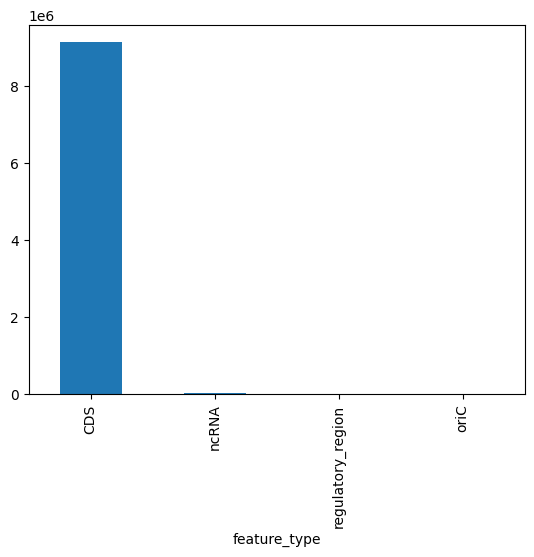

In [7]:
overlappingDf.feature_type.value_counts().plot(kind = 'bar')

### Overall

In [22]:
overlappingDf[['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().sort_values(by=['index'], ascending=False)[:10]

,name,gene,index
4483,yersiniabactin biosynthetic protein Irp1,irp1,17248
2704,chromosome partition protein MukB,mukb,17102
3143,glutamate synthase large subunit,gltb,17095
496,DNA translocase FtsK,ftsk,16289
3381,lipoprotein metalloprotease SslE,ssle,15615
252,AIDA-I family autotransporter adhesin YfaL/EhaC,yfal,14082
323,AsmA2 domain-containing protein YhdP,yhdp,13387
4304,trifunctional transcriptional regulator/prolin...,puta,12798
2864,diguanylate cyclase,dgce,12747
2552,beta-galactosidase subunit alpha,ebga,12571


In [8]:
overlappingDf.name.value_counts().reset_index()[:10]

,name,count
0,yersiniabactin biosynthetic protein Irp1,17248
1,chromosome partition protein MukB,17102
2,glutamate synthase large subunit,17095
3,DNA translocase FtsK,16289
4,lipoprotein metalloprotease SslE,15615
5,AIDA-I family autotransporter adhesin YfaL/EhaC,14082
6,AsmA2 domain-containing protein YhdP,13387
7,L%2CD-transpeptidase,13306
8,diguanylate cyclase,12928
9,trifunctional transcriptional regulator/prolin...,12798


In [10]:
overlappingDf.gene.value_counts()[:10]

gene
irp1    17248
mukb    17102
gltb    17095
ftsk    16289
ssle    15615
yfas    14594
fimd    14223
yfal    14082
yhdp    13387
fima    12811
Name: count, dtype: int64

### CDS

In [23]:
overlappingDf[overlappingDf.feature_type == 'CDS'][['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().sort_values(by=['index'], ascending=False)[:10]

,name,gene,index
4392,yersiniabactin biosynthetic protein Irp1,irp1,17248
2631,chromosome partition protein MukB,mukb,17102
3070,glutamate synthase large subunit,gltb,17095
479,DNA translocase FtsK,ftsk,16289
3305,lipoprotein metalloprotease SslE,ssle,15615
248,AIDA-I family autotransporter adhesin YfaL/EhaC,yfal,14082
316,AsmA2 domain-containing protein YhdP,yhdp,13387
4213,trifunctional transcriptional regulator/prolin...,puta,12798
2791,diguanylate cyclase,dgce,12747
2479,beta-galactosidase subunit alpha,ebga,12571


In [11]:
overlappingDf[overlappingDf.feature_type == 'CDS'].name.value_counts().reset_index()[:10]

,name,count
0,yersiniabactin biosynthetic protein Irp1,17248
1,chromosome partition protein MukB,17102
2,glutamate synthase large subunit,17095
3,DNA translocase FtsK,16289
4,lipoprotein metalloprotease SslE,15615
5,AIDA-I family autotransporter adhesin YfaL/EhaC,14082
6,AsmA2 domain-containing protein YhdP,13387
7,L%2CD-transpeptidase,13306
8,diguanylate cyclase,12928
9,trifunctional transcriptional regulator/prolin...,12798


In [15]:
overlappingDf[overlappingDf.feature_type == 'CDS'].gene.value_counts().reset_index()[:10]

,gene,count
0,irp1,17248
1,mukb,17102
2,gltb,17095
3,ftsk,16289
4,ssle,15615
5,yfas,14594
6,fimd,14223
7,yfal,14082
8,yhdp,13387
9,fima,12811


### LncRNA

In [24]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'][['name', 'gene', 'index']].groupby(by=['name', 'gene']).agg('count').reset_index().sort_values(by=['index'], ascending=False)[:10]

,name,gene,index
47,Nucleoid-associated noncoding RNA 4 (CssrE),narna4,4770
62,Short Intergenic Abundant RNA,sib_rna,2675
81,sok antitoxin (CssrC),sok,1785
72,antisense RNA of rseC mRNA,asrc,1736
34,Enterobacterial sRNA STnc550,stnc550,1562
7,Bacterial RNase P class A,rnasep_bact_a,1485
46,MicL sRNA,micl,886
15,CsrB/RsmB RNA family,csrb,839
12,C0719 RNA,c0719,778
79,ryfA RNA,ryfa,690


In [14]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'].name.value_counts().reset_index()[:10]

,name,count
0,Nucleoid-associated noncoding RNA 4 (CssrE),4770
1,Short Intergenic Abundant RNA,2675
2,sok antitoxin (CssrC),1785
3,antisense RNA of rseC mRNA,1736
4,Enterobacterial sRNA STnc550,1562
5,Bacterial RNase P class A,1485
6,MicL sRNA,886
7,CsrB/RsmB RNA family,839
8,C0719 RNA,778
9,ryfA RNA,690


In [16]:
overlappingDf[overlappingDf.feature_type == 'ncRNA'].gene.value_counts().reset_index()[:10]

,gene,count
0,narna4,4775
1,sib_rna,2675
2,sok,1794
3,asrc,1736
4,stnc550,1562
5,rnasep_bact_a,1485
6,micl,886
7,csrb,839
8,c0719,778
9,ryfa,690
